# Demo Iris MRR-NN
I will use the MNIST Dataset to demonstrate the usage of Lorentzian.py. While the MNIST task isn't the most suitable case for the application of a microring-resonator neural network, it is a well known task, benchmark and intuitive 

In [1]:
import tensorflow as tf
import lorentzian as lz
import numpy as np
from matplotlib import pyplot as plt
import utils as utils

In [2]:
# load Iris dataset
iris = np.genfromtxt("Data/iris_data_simplified.csv", delimiter=",")
X_train, X_val, X_test, y_train, y_val, y_test = utils.train_val_test_split(
    iris[:, :4], iris[:, 4], 0.7, 0.1, 0.2
)

In [3]:
# build model using MRRelu layers
model_mrrelu = tf.keras.Sequential()
# the MRRelu should function just like a typical Dense layer with
# restrictions to ensure MRR possible behavior
model_mrrelu.add(tf.keras.Input(shape=(4,)))
# model_mrrelu.add(lz.MMRelu(4, output_splitter=4))
model_mrrelu.add(lz.MMRelu(4, output_splitter=3, train_scale_output=True))
# model_mrrelu.add(lz.MMRelu(3, output_splitter=3, train_scale_output=False))
model_mrrelu.add(lz.MMRelu(3, train_scale_output=False))
model_mrrelu.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mm_relu (MMRelu)             (None, 4)                 20        
_________________________________________________________________
mm_relu_1 (MMRelu)           (None, 3)                 12        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [4]:
# define loss function and compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_mrrelu.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [5]:
history = model_mrrelu.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size=32
)

Epoch 1/300
4/4 [==============================] - 0s 48ms/step - loss: 1.1917 - accuracy: 0.3048 - val_loss: 1.2187 - val_accuracy: 0.3333
Epoch 2/300
4/4 [==============================] - 0s 8ms/step - loss: 1.2162 - accuracy: 0.3048 - val_loss: 1.2078 - val_accuracy: 0.3333
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 1.2050 - accuracy: 0.3048 - val_loss: 1.1973 - val_accuracy: 0.3333
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1933 - accuracy: 0.3048 - val_loss: 1.1877 - val_accuracy: 0.3333
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1822 - accuracy: 0.3048 - val_loss: 1.1785 - val_accuracy: 0.3333
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1718 - accuracy: 0.3048 - val_loss: 1.1695 - val_accuracy: 0.3333
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1621 - accuracy: 0.3048 - val_loss: 1.1612 - val_accuracy: 0.3333
Epoch 8/300
4/4 [=========

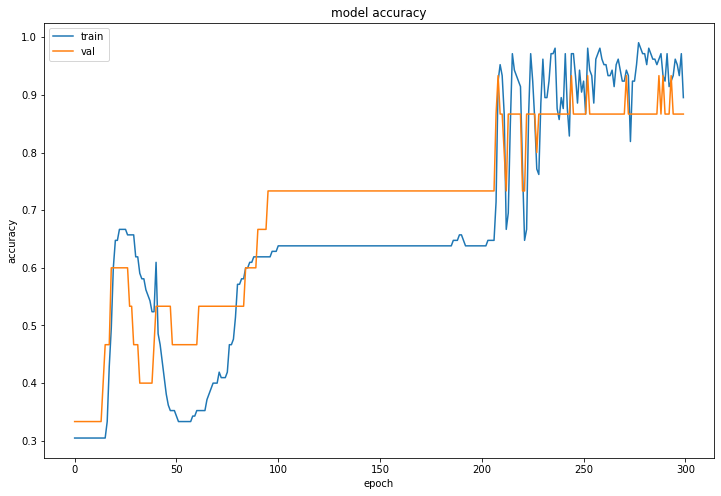

In [6]:
fig = plt.figure()
fig.set_size_inches(12, 8)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [7]:
model_mrrelu.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.1811 - accuracy: 0.9667


[0.18106390535831451, 0.9666666388511658]

In [8]:
preds = np.argmax(model_mrrelu.predict(X_test), axis=1)
preds - y_test

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [9]:
model_lorz = lz.create_lorentz_from_mrrelu(model_mrrelu)
model_lorz.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model_lorz.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lorentzian (Lorentzian)      (None, 4)                 23        
_________________________________________________________________
lorentzian_1 (Lorentzian)    (None, 3)                 15        
Total params: 38
Trainable params: 32
Non-trainable params: 6
_________________________________________________________________


In [10]:
model_lorz.evaluate(X_test, y_test)
preds = np.argmax(model_lorz.predict(X_test), axis=1)
print(preds - y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9667
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
